## Проект по курсу "Принятие решений в бизнесе"

## Описание проекта

Мы представляем аналитика крупного интернет-магазина. Вместе с отделом маркетинга нам подготовили список гипотез для увеличения выручки.  
Наша задача:  
- Приоритизировать гипотезы,  
- Запустить A/B-тест,  
- Проанализировать результаты.  

Для выполнения задач мы располагаем следующими датасетами:

 1. Файл `/datasets/hypothesis.csv`
- **Hypothesis** — краткое описание гипотезы;  
- **Reach** — охват пользователей по 10-балльной шкале;  
- **Impact** — влияние на пользователей по 10-балльной шкале;  
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;  
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение, тем дороже проверка гипотезы).  

 2. Файл `/datasets/orders.csv`
- **transactionId** — идентификатор заказа;  
- **visitorId** — идентификатор пользователя, совершившего заказ;  
- **date** — дата, когда был совершён заказ;  
- **revenue** — выручка заказа;  
- **group** — группа A/B-теста, в которую попал заказ.  

 3. Файл `/datasets/visitors.csv`
- **date** — дата;  
- **group** — группа A/B-теста;  
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста.  


## Цель анализа:
  - Проанализировать результаты A/B-теста и принять решение по гипотезам, учитывая различия в конверсии и среднем чеке между группами.
  - Определить, есть ли статистически значимые различия между группами, и предложить рекомендации на основе анализа.

## План работы

1. Открытие файла и изучение содержимого


2. Приоритизация гипотез
- Применение фреймворка **ICE** для приоритизации гипотез и сортировка их по убыванию приоритета.
- Применение фреймворка **RICE** для приоритизации гипотез и сортировка их по убыванию приоритета.
- Вывод и сравнение приоритетов по ICE и RICE.

3. Анализ A/B-теста

 3.1. Кумулятивные метрики
- Построение графика кумулятивной выручки по группам с выводами и предположениями.
- Построение графика кумулятивного среднего чека по группам с выводами и предположениями.
- Построение графика относительного изменения кумулятивного среднего чека группы B к группе A с выводами и предположениями.
- Построение графика кумулятивного среднего количества заказов на посетителя по группам с выводами и предположениями.
- Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A с выводами и предположениями.

 3.2. Анализ аномалий
- Построение точечного графика количества заказов по пользователям с выводами и предположениями.
- Рассчёт 95-го и 99-го перцентилей количества заказов на пользователя с выбором границы для определения аномальных пользователей.
- Построение точечного графика стоимостей заказов с выводами и предположениями.
- Рассчёт 95-го и 99-го перцентилей стоимости заказов с выбором границы для определения аномальных заказов.

 3.3. Статистический анализ
- Рассчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным с выводами и предположениями.
- Рассчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным с выводами и предположениями.
- Рассчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным с выводами и предположениями.
- Рассчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным с выводами и предположениями.

 4. Принятие решения по результатам теста

#### Открытие файла и изучение содержимого.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
from scipy import stats
register_matplotlib_converters()
pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
data.columns = data.columns.str.lower()

#### Приоритизация гипотез

**Вычисляю метрику ICE для каждой гипотезы по формуле:
ICE = (Impact * Confidence) / Efforts.**

In [5]:
data['ice_score'] = (data['impact']*data['confidence'])/data['efforts']
data.sort_values(by='ice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


**Вычисляю метрику RICE для каждой гипотезы:
RICE = (Reach * Impact * Confidence) / Efforts.**

In [6]:
data['rice_score'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
data.sort_values(by='rice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


**Вывод и сравнение приоритетов по ICE и RICE:**

При использовании ICE на первое место вышла гипотеза №8 (скидка на день рождения), затем №0, а гипотеза №7 (форма подписки) была на третьем месте.

При использовании RICE расстановка приоритетов изменилась. На первое место по RICE поднялась гипотеза №7, которая имеет высокий показатель Reach. Второе место заняла гипотеза №2, которая тоже обладает достаточно широким охватом и хорошими показателями Impact и Confidence.

**Почему произошли изменения?**

Главное отличие RICE от ICE в том, что в формулу RICE добавляется показатель Reach (охват). Это означает, что гипотезы, которые могут затронуть большее количество пользователей (имеют высокий Reach), получают более высокий приоритет.
В случае ICE мы учитываем только влияние (Impact) и уверенность (Confidence) по отношению к затратам (Efforts). В RICE же добавляется ещё один важный фактор: «Сколько людей охватит улучшение?».
Поэтому гипотезы с высоким Reach в RICE поднимаются выше в рейтинге, даже если по ICE они были не лидерами.
Таким образом, приоритизация изменилась вследствие добавления фактора Reach, что показало, что гипотезы с потенциально большим охватом аудитории стоит рассматривать в первую очередь.

#### Анализ A/B-теста

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Проверяю датафрейм `orders`.

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Описание данных

Датасет содержит 1 197 строк и 5 столбцов. Были выявлены следующие проблемы:

- **Некорректные типы данных:** Столбец `date` и  имеет некорректный тип данных, что требует приведения к правильному типу.
- **Пропуски данных:**  отсутсвуют.
- **Формат наименований столбцов:** Наименования  столбцов `transactionId` и `visitorId` требуется привести в соотвествие со `змеинным` регистром.

Планируемые действия:

1. Приведение наименований столбцов к корректному регистру.
2. Приведение столбца `date` к корректному типу данных.
3. Проверка на наличие дубликатов и удаление дубликатов.

Эти действия необходимы для подготовки данных к дальнейшему анализу и моделированию.

In [10]:
orders = orders.rename(columns={
    'transactionId': 'transaction_id',
    'visitorId': 'visitor_id'
})
print(orders.head(5))

   transaction_id  visitor_id        date  revenue group
0      3667963787  3312258926  2019-08-15     1650     B
1      2804400009  3642806036  2019-08-15      730     B
2      2961555356  4069496402  2019-08-15      400     A
3      3797467345  1196621759  2019-08-15     9759     B
4      2282983706  2322279887  2019-08-15     2308     B


In [11]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [12]:
orders.duplicated().sum()

0

Ищем пользователей, которые могли попасть в обе группы.

Группировка данных по visitor_id и подсчет уникальных групп для каждого пользователя.

In [13]:
user_groups = orders.groupby('visitor_id')['group'].nunique().sort_values(ascending=False)
user_groups

visitor_id
2654030115    2
3891541246    2
3941795274    2
1404934699    2
351125977     2
             ..
1476256851    1
1476741193    1
1484903144    1
1485964287    1
4283872382    1
Name: group, Length: 1031, dtype: int64

Считаем количетсво пользователей, попавших в обе группы.

In [14]:
ab_group_users = user_groups[user_groups > 1]
ab_group_users.count()

58

Считаем общее количетсво пользователей.

In [15]:
total_users = orders['visitor_id'].nunique()
total_users

1031

In [16]:
percentage_ab_users  = (len(ab_group_users)/total_users)*100
percentage_ab_users

5.625606207565471

В связи с тем, что были обнаружены пользователи, попавшие в обе группы, было принято решение удалить их из датафрейма. Такие пересечения нарушают принцип независимости групп, что приводит к статистическим аномалиям и снижению достоверности выводов.

In [17]:
orders = orders[~orders['visitor_id'].isin(ab_group_users.index)]

Проверяем, что получилось.

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Приступаем к проверке датафрейма `visitors`

In [19]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Описание данных

Датасет содержит 62 строки и 3 столбца. Были выявлены следующие проблемы:

- **Некорректные типы данных:** Столбец `date` и  имеет некорректный тип данных, что требует приведения к правильному типу.
- **Пропуски данных:**  отсутсвуют.


Планируемые действия:

1. Приведение столбца `date` к корректному типу данных.
2. Проверка на наличие дубликатов и удаление дубликатов.

Эти действия необходимы для подготовки данных к дальнейшему анализу и моделированию.

In [21]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [22]:
visitors.duplicated().sum()

0

In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Приступаем к получению уникальных комбинаций дат и групп.
Здесь из таблицы orders берутся все уникальные пары (date, group). Это нужно, чтобы позже агрегировать данные по каждой дате и группе.

In [24]:
dates_groups = orders[['date','group' ]].drop_duplicates()

Агрегирование кумулятивных данных о заказах.
Для каждой комбинации (date, group) мы фильтруем исходный orders, оставляя только строки с:
той же группой,
датами не позднее текущей даты x['date'].
Затем считаем:
date: max – последняя (текущая) дата
group: max – текущая группа
transaction_id: nunique – уникальное количество заказов до (и включая) текущую дату для данной группы
visitor_id: nunique – уникальное количество покупателей (по уникальным ID посетителей) за тот же период
revenue: sum – сумму выручки за период
После расчёта для всех (date, group) сортируем полученный фрейм по дате и группе.

In [25]:
orders_aggregated = dates_groups\
.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

Аналогично шагу с заказами, но для visitors. Для каждого (date, group) считаем:

дату (максимальную для агрегируемого периода),
группу,
суммарное количество посетителей (visitors) с начала периода и до текущей даты включительно.

In [26]:
visitors_aggregated = dates_groups\
.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединение кумулятивных данных по заказам и посетителям.
Объединяем кумулятивные данные о заказах и о посетителях по столбцам date и group, чтобы в итоге получить единый набор агрегированных данных.

In [27]:
cumulative_data = orders_aggregated\
.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

Присваиваем более понятные имена колонкам в итоговом фрейме:

orders – кумулятивное количество заказов,
buyers – кумулятивное количество уникальных покупателей,
revenue – кумулятивная выручка,
visitors – кумулятивное количество посетителей.

In [28]:
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

Создаём отдельные датафреймы с кумулятивной выручкой (и заказами) по группам A и B.

In [29]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

#####  Кумулятивные метрики

Построение графика кумулятивной выручки по группам.

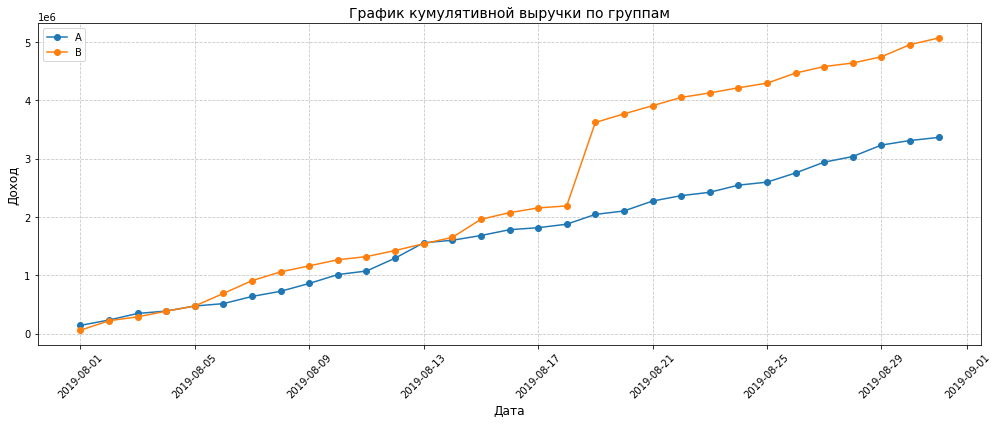

In [30]:
plt.figure(figsize=(14, 6))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A', marker='o')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B', marker='o')

plt.title("График кумулятивной выручки по группам", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Доход", fontsize=12)

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


На графике мы видим два графика кумулятивной выручки: для группы A и для группы B.
По форме кривых можно оценить темпы роста выручки в каждой группе.
Судя по представленному графику:
Группа B на многих отрезках времени генерирует кумулятивную выручку, которая выше, чем у группы A.
В какой-то момент (судя по графику, примерно в середине периода) у группы B случился достаточно значительный скачок выручки. Это может быть связано либо с одним крупным заказом, либо с резким увеличением количества заказов. После этого момента кривая группы B остаётся выше кривой группы A.
Кумулятивная выручка в группе A также стабильно растёт, но с меньшими темпами. Она выглядит более плавно без резких скачков.
Предположения:

Резкий рост в группе B может говорить о выбросах в данных: возможно, один или несколько клиентов совершили очень крупные заказы.
Также это может означать, что в группу B попадали пользователи с высокой склонностью к покупкам (или присутствовала какая-то акция), что привело к повышению среднего чека.
Если цель эксперимента – оценить конверсию и средний чек, стоит обратить внимание на “аномалии” в группе B и, при необходимости, обработать выбросы или анализировать данные без учёта необычно крупных заказов.
Итого, по графику можно заключить, что группа B в целом показывает более высокую кумулятивную выручку, но наличие аномалий (резких скачков) требует дополнительного анализа.

Построение графика кумулятивного среднего чека по группам.

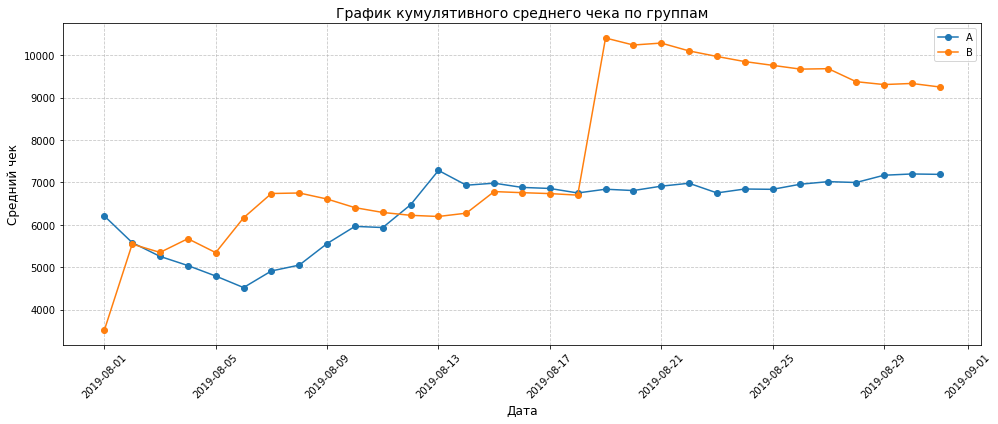

In [31]:
plt.figure(figsize=(14, 6)) 

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A', marker='o')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B', marker='o')

plt.title("График кумулятивного среднего чека по группам", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Средний чек", fontsize=12)

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


Группа B показывает более высокий кумулятивный средний чек, однако на графике заметен резкий скачок, указывающий на аномально крупные заказы. Без учёта выбросов может оказаться, что разница между группами менее существенна. В целом средний чек в группе B выше, но стоит проанализировать выбросы для более точных выводов.

Формирование объединённого датафрейма для оценки относительного изменения среднего чека.

In [32]:
merge_cumulative_revenue = cumulative_revenue_a\
.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

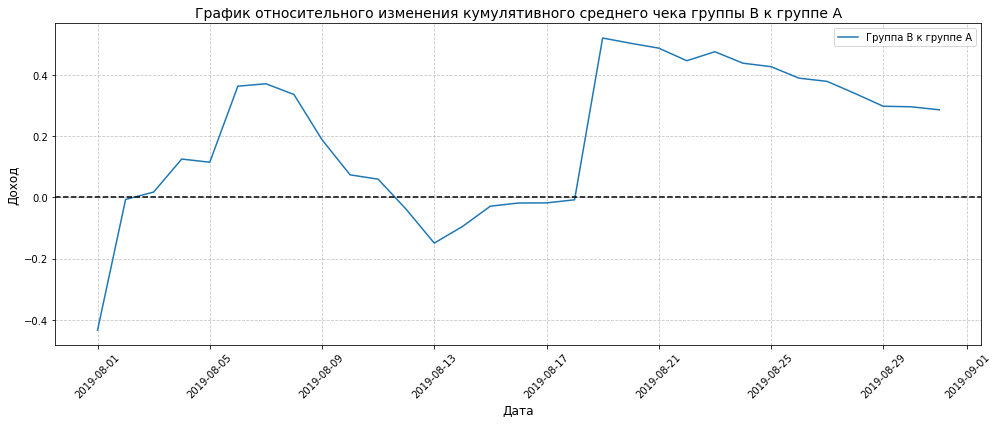

In [33]:
plt.figure(figsize=(14, 6))

plt.plot\
    (merge_cumulative_revenue['date'],\
    (merge_cumulative_revenue['revenueB']/merge_cumulative_revenue['ordersB'])\
    /(merge_cumulative_revenue['revenueA']/merge_cumulative_revenue['ordersA'])-1,\
    label='Группа B к группе A')

plt.axhline(y=0, color='black', linestyle='--')

plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Доход", fontsize=12)

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=10)

plt.tight_layout()
plt.show()



Группа B в целом имеет более высокий кумулятивный средний чек по сравнению с группой A, но на графике заметны резкие колебания. Особенно бросается в глаза скачок, после которого средний чек B значительно превышает A. Это может быть признаком аномально крупных заказов в группе B.

Построение графика кумулятивного среднего количества заказов на посетителя по группам.

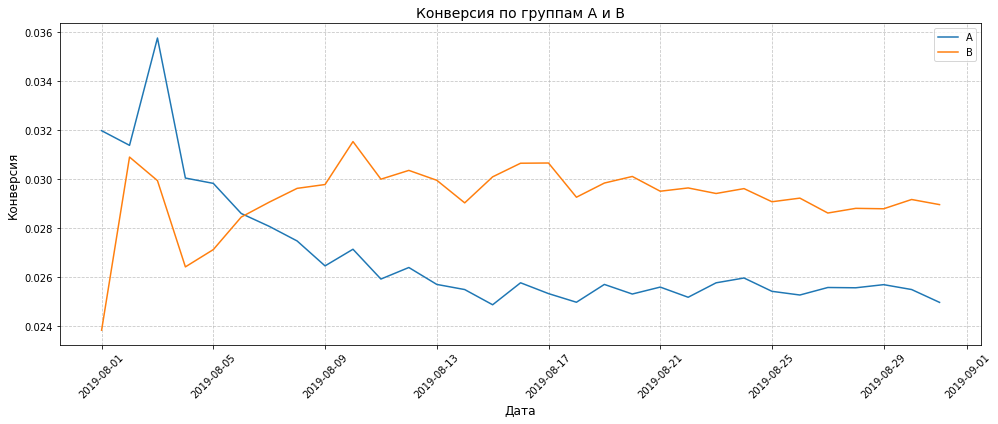

In [34]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize=(14, 6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.legend(fontsize=10)
plt.title("Конверсия по группам A и B", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Конверсия", fontsize=12)

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Конверсия в группе B на большинстве временных интервалов выше, чем в группе A. Таким образом, группа B демонстрирует более высокий процент посетителей, совершающих покупки, по сравнению с группой A.

Формирование графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

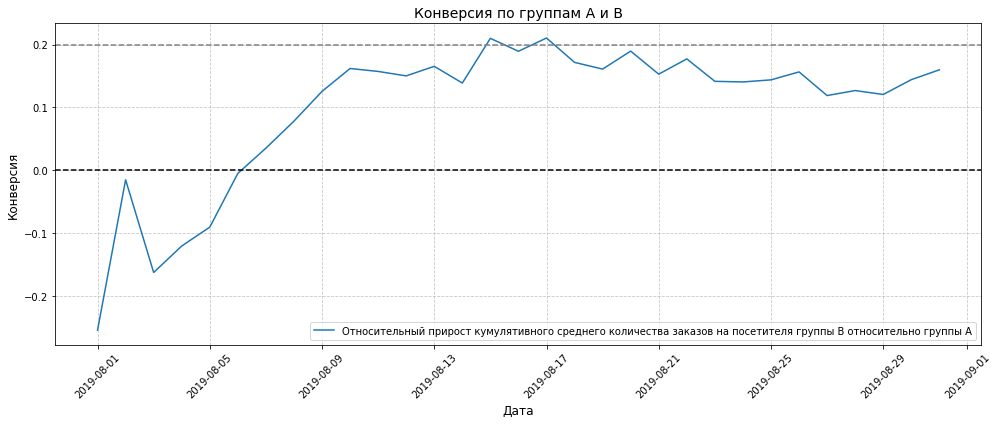

In [35]:
merge_cumulative_conversion = \
cumulative_data_a[['date','conversion']]\
.merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 6))
plt.plot(
  merge_cumulative_conversion['date'], merge_cumulative_conversion['conversionB']/merge_cumulative_conversion['conversionA']-1,\
  label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.legend(fontsize=10)
plt.title("Конверсия по группам A и B", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Конверсия", fontsize=12)

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Конверсия группы B устойчиво превышает конверсию группы A, достигая в некоторые моменты прироста более 20%. Это говорит о том, что группа B показывает значительно лучший результат по числу заказов на посетителя.

##### Анализ аномалий

Подготовка данных для формирование точечного графика количества заказ по пользователям.

In [36]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

Формирование точечного графика и гисрограммы количества заказов по пользователям.

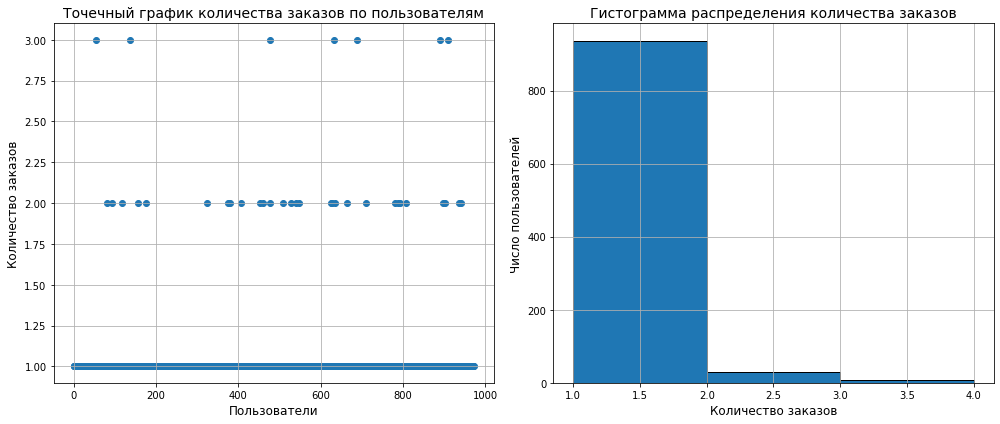

In [37]:
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
plt.scatter(x_values, orders_by_users['transaction_id'])
plt.title("Точечный график количества заказов по пользователям", fontsize=14)
plt.xlabel("Пользователи", fontsize=12)
plt.ylabel("Количество заказов", fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)  
plt.hist(orders_by_users['transaction_id'], bins=range(1, orders_by_users['transaction_id'].max() + 2), edgecolor='black')
plt.title("Гистограмма распределения количества заказов", fontsize=14)
plt.xlabel("Количество заказов", fontsize=12)
plt.ylabel("Число пользователей", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


Основная масса пользователей совершает только один заказ. Это видно как на точечном графике, где большинство точек сосредоточено на уровне 1 заказа, так и на гистограмме, где столбец, соответствующий 1 заказу, доминирует.

Однако, есть пользователи, которые совершили 2 и более заказов. Эти случаи редки, но они выбиваются из общего распределения. Например, на точечном графике видно, что отдельные пользователи совершили 3-4 заказа, что является аномалией.

Гистограмма распределения подтверждает, что абсолютное большинство пользователей ограничиваются единичным заказом, а повторные заказы характерны для меньшинства.

Считаю 95-й и 99-й перцентили количества заказов на пользователя.

In [38]:
print(np.percentile(orders_by_users['transaction_id'], [ 95, 99]))

[1. 2.]


Не более 5% пользователей совершили более одного заказа и не более 1% совершили более двух заказов.

Формирование точечного графика и гисрограммы стоимости заказов.

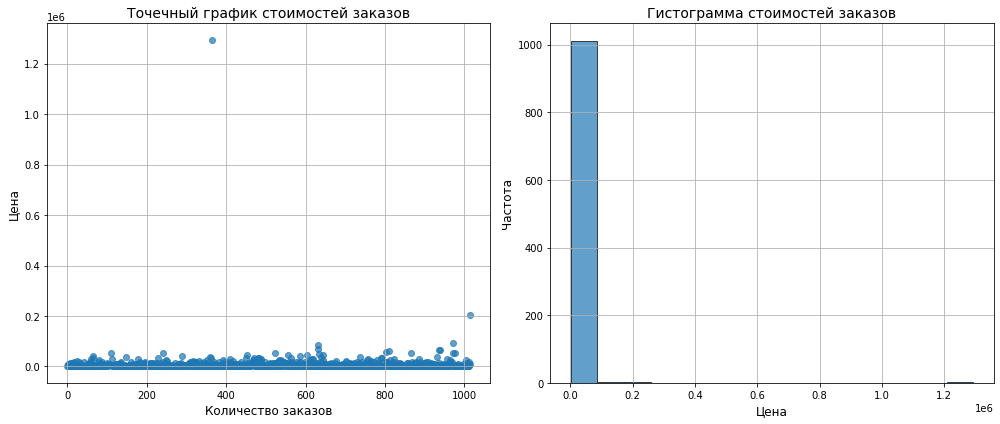

In [39]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_values, orders['revenue'], alpha=0.7)
plt.title("Точечный график стоимостей заказов", fontsize=14)
plt.xlabel("Количество заказов", fontsize=12)
plt.ylabel("Цена", fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(orders['revenue'], bins=15, edgecolor='black', alpha=0.7)
plt.title("Гистограмма стоимостей заказов", fontsize=14)
plt.xlabel("Цена", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

Основная масса заказов сосредоточена в районе относительно невысоких сумм. На графике видно, что почти все заказы имеют стоимость в пределах небольшой величины.

Аномально высокие заказы заметны по отдельным точкам, выбивающимся из общего распределения на точечном графике. Например, есть один заказ, сумма которого превышает 1 200 000. Это крайне редкое событие на фоне остальных.

Гистограмма показывает, что абсолютное большинство заказов сосредоточено около низких значений цен. Практически весь столбец частоты приходится на область до 100 000, а заказы выше этой суммы — единичные случаи.

Таким образом, распределение стоимости заказов сильно смещено в сторону меньших значений, при этом присутствуют немногочисленные, но крайне крупные заказы, которые можно считать аномалиями или «выбросами».

Считаю 95-й и 99-й перцентили стоимости заказа.

In [40]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более, чем у 5% заказов чек дороже 26 785 рублей. И не больше, чем у 1% заказов — дороже 53 904 рубля. 

##### Статистический анализ

Считаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Формулировка гипотез:

Нулевая гипотеза (H0): Нет различий в среднем количестве заказов на пользователя между группами A и B.
Альтернативная гипотеза (H1): Есть различия в среднем количестве заказов на пользователя между группами A и B.

Вычисляем ежедневное и накопленное количество посетителей для групп `A` и `B`.

In [41]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

In [42]:
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

Вычисляем ежедневное и накопленное число заказов и выручки для групп `A` и `B`. 

In [43]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

Объединяем все данные в один DataFrame.

In [44]:
data_raw = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

Вычисляем заказы по пользователям в каждой группе и создаем выборки для `A/B-теста`.

In [45]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'transaction_id']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'transaction_id']

sample_a = pd.concat(
    [
        orders_by_users_a['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data_raw['visitors_per_date_a'].sum() - len(orders_by_users_a['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data_raw['visitors_per_date_b'].sum() - len(orders_by_users_b['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

Применение статистического теста Mann-Whitney U

In [46]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.011
0.160


На основании представленных данных и результатов статистического анализа можно сделать следующие выводы:

1. Проверка гипотез:
Нулевая гипотеза: различий в среднем количестве заказов между группами A и B нет.
Альтернативная гипотеза: различия в среднем количестве заказов между группами A и B есть.
2. Результаты теста Манна-Уитни:
Значение p-value = 0.011.
Это значение меньше общепринятого уровня значимости (обычно 0.05), что позволяет отвергнуть нулевую гипотезу.
Вывод: существуют статистически значимые различия в среднем количестве заказов между группами A и B.
3. Относительное изменение среднего:
Относительное изменение среднего количества заказов между группами равно 0.160 (или 16%).
Группа B демонстрирует увеличение среднего количества заказов на 16% по сравнению с группой A.

Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
Нулевая гипотеза (H0): Нет различий в среднем чеке заказа между группами A и B.
Альтернативная гипотеза (H1): Есть различия в в среднем чеке заказа между группами A и B.

In [47]:
print('p-value : {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value : 0.829
0.287


По результатам теста Манна-Уитни p-value ≈ 0.829, что значительно выше порогового уровня значимости в 0.05. Это означает, что оснований для отклонения нулевой гипотезы нет. Таким образом, статистически значимых различий в среднем чеке между группами A и B обнаружить не удалось.

Относительная разница между средними чеками групп (группа B по сравнению с группой A) составляет примерно 28,7%. Несмотря на это, высокое p-value говорит о том, что наблюдаемая разница может быть вызвана случайными факторами, а не систематическими отличиями между группами.

Вывод:
Хотя средний чек в группе B по «сырым» данным и выше, статистический тест не подтверждает, что это отличие является статистически значимым. Иными словами, с учётом текущих данных нельзя уверенно утверждать, что группа B действительно превосходит группу A по среднему чеку.

Подготавливаю `очищенные` данные.

In [48]:

users_with_many_orders = pd.concat(
    [
        orders_by_users_a[
            orders_by_users_a['transaction_id'] > np.percentile(orders_by_users_a['transaction_id'], 99)
        ]['visitor_id'],
        orders_by_users_b[
            orders_by_users_b['transaction_id'] > np.percentile(orders_by_users_b['transaction_id'], 99)
        ]['visitor_id'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[
    orders['revenue'] > np.percentile(orders['revenue'], 99)
]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Вывод результатов
print("Первые 5 аномальных пользователей:")
print(abnormal_users.head(5))
print("Общее количество аномальных пользователей:", abnormal_users.shape[0])


Первые 5 аномальных пользователей:
1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64
Общее количество аномальных пользователей: 16


Считаю статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.
Сначала подготовлю выборки количества заказов по пользователям по группам теста:

In [49]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data_raw['visitors_per_date_a'].sum() - len(orders_by_users_a['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data_raw['visitors_per_date_b'].sum() - len(orders_by_users_b['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

Считаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
Нулевая гипотеза (H0): Нет различий в среднем количестве заказов между группами A и B.
Альтернативная гипотеза (H1): Есть различия в в среднем среднем количестве заказов между группами A и B.

In [50]:
print('{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

0.007
0.189


После удаления аномальных пользователей p-value ≈ 0.009, что меньше порога значимости 0.05. Это говорит о том, что у нас есть статистически значимые различия в среднем количестве заказов между группами A и B.

Относительная разница стала примерно 18.9% (0.189) в пользу группы B. Это означает, что после очистки данных от выбросов группа B в среднем совершает на 18.9% больше заказов на пользователя, чем группа A.

**Вывод:
Отвергаем нулевую гипотеру(Н0): Нет различий в среднем количестве заказов между группами A и B.**

Нулевая гипотеза (H0): Нет различий в среднем чеке заказа между группами A и B.
Альтернативная гипотеза (H1): Есть различия в в среднем чеке заказа между группами A и B.

In [51]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.788
-0.032


Значение p-value ≈ 0.738 — это гораздо выше порога 0.05, что означает отсутствие статистически значимых различий в среднем чеке между группами A и B после удаления аномальных пользователей.

Относительная разница среднего чека теперь составляет примерно -2% (около -0.02), т.е. средний чек в группе B стал даже немного ниже, чем в группе A. Однако учитывая, что разница статистически незначима, нельзя сделать уверенный вывод о каком-либо преимуществе группы B или A по этому параметру.

Вывод:
После удаления аномальных пользователей статистически значимые различия в среднем чеке между группами так и не появились. Отличия в среднем чеке можно считать случайными.

**Мы принимаем нулевую гипотезу (H0): нет статистически значимых различий в среднем чеке заказа между группами A и B.**

#### Принятие решения по результатам теста

По количеству заказов на посетителя (конверсии) после удаления аномалий получено статистически значимое улучшение в группе B по сравнению с группой A.
По среднему чеку статистически значимой разницы выявлено не было ни до, ни после удаления аномалий.
Таким образом, ключевой показатель эффективности (конверсия) лучше в группе B и эта разница статистически значима. Это говорит в пользу того, что изменения, внедрённые в группе B, оказывают положительное влияние на ключевой бизнес-показатель.

Решение:
Остановить тест и зафиксировать победу группы B, так как она показала статистически значимо более высокую конверсию.

##  Описание проделанной работы

 1. Изучение данных:
- Открытие и анализ трёх предоставленных датасетов:
  - **`hypothesis.csv`**: содержит данные о гипотезах для увеличения выручки.
  - **`orders.csv`**: включает информацию о заказах, их идентификаторы, даты и выручку.
  - **`visitors.csv`**: содержит данные о количестве пользователей в A/B-группах.
- Проверка данных на наличие пропусков, дубликатов и ошибок.

 2. Приоритизация гипотез:
- Применение фреймворка **ICE** для оценки гипотез по трём критериям: влияние, уверенность и затраты.
- Применение фреймворка **RICE** с учётом охвата аудитории, что изменило приоритеты гипотез.
- Сравнение результатов **ICE** и **RICE**, объяснение изменений при переходе между фреймворками.

 3. Анализ A/B-теста:
 Кумулятивные метрики:
- Построение и анализ графиков:
  - Кумулятивной выручки по группам.
  - Кумулятивного среднего чека по группам.
  - Кумулятивного среднего количества заказов на посетителя.
  - Относительных изменений метрик между группами A и B.

 Анализ аномалий:
- Построение точечных графиков стоимости заказов и количества заказов на пользователя.
- Вычисление 95-го и 99-го перцентилей для определения аномальных пользователей и заказов.
- Исключение аномалий для подготовки «очищенных» данных.

 Статистический анализ:
- Расчёт статистической значимости различий:
  - В среднем количестве заказов на посетителя между группами по «сырым» и «очищенным» данным.
  - В среднем чеке заказа между группами по «сырым» и «очищенным» данным.
- Использование критерия **Манна-Уитни** для тестирования гипотез.

 4. Принятие решения:
- На основе анализа данных и результатов статистических тестов сделан вывод о победе группы B.
- Разработаны рекомендации по внедрению изменений, протестированных в группе B.

 5. Документирование результатов:
- Подготовлено описание выполненных шагов.
- Оформлены выводы и рекомендации для бизнеса.
- Все этапы исследования были визуализированы и представлены в удобном формате для анализа.